In [92]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
data = pd.read_csv('book7.csv')

In [95]:
data.shape

(1534, 19)

In [96]:
df = data.dropna()

In [97]:
df = df.drop_duplicates()

In [98]:
df.shape

(1480, 19)

In [99]:
df.isnull()

,followers_per_followees,replies_to_tweets,tweets_with_url_to_total_tweets,number_of_replies,hastag_count_to_word_count_mean,hastag_count_to_word_count_median,hastag_count_to_word_count_min,hastag_count_to_word_count_max,url_count_to_word_count_mean,url_count_to_word_count_median,url_count_to_word_count_min,url_count_to_word_count_max,characters_per_tweet_mean,characters_per_tweet_median,characters_per_tweet_min,characters_per_tweet_max,time_between_posts_mean,time_between_posts_median,spammer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1530,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1531,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1532,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [100]:
data.isnull().sum() 

followers_per_followees              0
replies_to_tweets                    0
tweets_with_url_to_total_tweets      0
number_of_replies                    0
hastag_count_to_word_count_mean      0
hastag_count_to_word_count_median    0
hastag_count_to_word_count_min       0
hastag_count_to_word_count_max       0
url_count_to_word_count_mean         0
url_count_to_word_count_median       0
url_count_to_word_count_min          0
url_count_to_word_count_max          0
characters_per_tweet_mean            0
characters_per_tweet_median          0
characters_per_tweet_min             0
characters_per_tweet_max             0
time_between_posts_mean              0
time_between_posts_median            0
spammer                              0
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 1533
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   followers_per_followees            1480 non-null   float64
 1   replies_to_tweets                  1480 non-null   float64
 2   tweets_with_url_to_total_tweets    1480 non-null   float64
 3   number_of_replies                  1480 non-null   int64  
 4   hastag_count_to_word_count_mean    1480 non-null   float64
 5   hastag_count_to_word_count_median  1480 non-null   float64
 6   hastag_count_to_word_count_min     1480 non-null   float64
 7   hastag_count_to_word_count_max     1480 non-null   float64
 8   url_count_to_word_count_mean       1480 non-null   float64
 9   url_count_to_word_count_median     1480 non-null   float64
 10  url_count_to_word_count_min        1480 non-null   float64
 11  url_count_to_word_count_max        1480 non-null   float

In [102]:
df['replies_to_tweets'].unique()

array([0.347826, 0.      , 0.094118, ..., 0.052897, 0.088223, 0.227129])

In [103]:
df['tweets_with_url_to_total_tweets'].unique()

array([0.184783, 1.      , 0.453846, ..., 0.09068 , 0.01984 , 0.123028])

In [104]:
df.describe()

,followers_per_followees,replies_to_tweets,tweets_with_url_to_total_tweets,number_of_replies,hastag_count_to_word_count_mean,hastag_count_to_word_count_median,hastag_count_to_word_count_min,hastag_count_to_word_count_max,url_count_to_word_count_mean,url_count_to_word_count_median,url_count_to_word_count_min,url_count_to_word_count_max,characters_per_tweet_mean,characters_per_tweet_median,characters_per_tweet_min,characters_per_tweet_max,time_between_posts_mean,time_between_posts_median
count,1.480000e+03,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1.480000e+03,1.480000e+03
mean,1.761738e+04,0.235905,0.351106,354.631081,0.022594,0.023048,0.002243,0.421114,0.036523,0.037410,0.008063,0.405686,83.486778,83.952027,17.325676,158.312162,7.964183e+04,5.171927e+04
std,3.234968e+05,0.211325,0.326601,630.009682,0.034381,0.079835,0.019953,0.324729,0.043907,0.076627,0.028604,0.333754,26.701326,40.905286,21.070714,85.609084,3.492566e+05,4.249780e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,4.285710e-01,0.031790,0.099366,2.000000,0.002600,0.000000,0.000000,0.166700,0.008500,0.000000,0.000000,0.166700,69.998975,57.750000,5.000000,140.000000,7.697558e+03,1.527500e+02
50%,9.116510e-01,0.200167,0.215110,64.500000,0.009486,0.000000,0.000000,0.333300,0.021147,0.000000,0.000000,0.250000,82.377600,82.000000,10.000000,148.000000,2.053720e+04,1.681500e+03
75%,2.033269e+00,0.379865,0.549521,428.250000,0.027568,0.000000,0.000000,0.603850,0.049536,0.058820,0.000000,0.500000,96.879650,111.000000,20.000000,158.000000,4.762887e+04,1.441725e+04
max,1.175158e+07,1.000000,1.000000,4803.000000,0.388500,1.000000,0.375000,1.000000,0.740600,1.000000,0.250000,1.000000,513.082500,781.000000,140.000000,1022.000000,8.723246e+06,1.250166e+07


In [105]:
 sum(df.duplicated())

0

In [106]:
df.tail()

,followers_per_followees,replies_to_tweets,tweets_with_url_to_total_tweets,number_of_replies,hastag_count_to_word_count_mean,hastag_count_to_word_count_median,hastag_count_to_word_count_min,hastag_count_to_word_count_max,url_count_to_word_count_mean,url_count_to_word_count_median,url_count_to_word_count_min,url_count_to_word_count_max,characters_per_tweet_mean,characters_per_tweet_median,characters_per_tweet_min,characters_per_tweet_max,time_between_posts_mean,time_between_posts_median,spammer
1529,0.156171,0.052897,0.090680,21,0.060792,0.000000,0.0,0.5,0.009559,0.000000,0.0,0.250000,61.294710,54,4,144,15416.26768,658,no
1530,0.244019,0.088223,0.019840,209,0.065241,0.043478,0.0,1.0,0.001333,0.000000,0.0,0.142857,88.558041,87,9,146,12068.11740,1264,no
1531,0.804878,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,42.000000,42,42,42,0.00000,0,no
1532,0.161421,0.000000,0.800000,0,0.000000,0.000000,0.0,0.0,0.036877,0.045455,0.0,0.050000,107.400000,122,40,132,23704.50000,4824,no
1533,0.306452,0.227129,0.123028,144,0.053189,0.000000,0.0,1.0,0.011569,0.000000,0.0,0.250000,82.854890,79,11,140,26263.49605,10969,no


In [107]:
df['spammer'].value_counts()

yes    1014
no      466
Name: spammer, dtype: int64

In [108]:
X = df.drop(labels='spammer', axis=1)
#Response variable
Y = df.loc[:,'spammer']

In [109]:
df

,followers_per_followees,replies_to_tweets,tweets_with_url_to_total_tweets,number_of_replies,hastag_count_to_word_count_mean,hastag_count_to_word_count_median,hastag_count_to_word_count_min,hastag_count_to_word_count_max,url_count_to_word_count_mean,url_count_to_word_count_median,url_count_to_word_count_min,url_count_to_word_count_max,characters_per_tweet_mean,characters_per_tweet_median,characters_per_tweet_min,characters_per_tweet_max,time_between_posts_mean,time_between_posts_median,spammer
0,0.682927,0.347826,0.184783,32,0.008800,0.000000,0.0000,0.2500,0.020200,0.000000,0.0000,0.250000,96.956500,95,19,144,21957.83520,703,yes
1,0.000000,0.000000,1.000000,0,0.166700,0.166670,0.1667,0.1667,0.166700,0.166670,0.1667,0.166700,105.000000,105,105,105,0.00000,0,yes
2,0.166667,0.000000,0.453846,0,0.046500,0.090910,0.0000,1.0000,0.065800,0.000000,0.0000,1.000000,101.315400,68,15,515,4561.23170,6108,yes
3,1.987500,0.094118,0.835294,40,0.043300,0.000000,0.0000,0.4444,0.065500,0.062500,0.0000,0.250000,102.748200,132,17,154,20191.84910,424,yes
4,1.000701,0.653846,0.192308,17,0.017300,0.000000,0.0000,0.0909,0.014800,0.000000,0.0000,0.125000,106.538500,140,9,143,257839.04000,54,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,0.156171,0.052897,0.090680,21,0.060792,0.000000,0.0000,0.5000,0.009559,0.000000,0.0000,0.250000,61.294710,54,4,144,15416.26768,658,no
1530,0.244019,0.088223,0.019840,209,0.065241,0.043478,0.0000,1.0000,0.001333,0.000000,0.0000,0.142857,88.558041,87,9,146,12068.11740,1264,no
1531,0.804878,0.000000,0.000000,0,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,42.000000,42,42,42,0.00000,0,no
1532,0.161421,0.000000,0.800000,0,0.000000,0.000000,0.0000,0.0000,0.036877,0.045455,0.0000,0.050000,107.400000,122,40,132,23704.50000,4824,no


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [113]:
# Create individual models
rf = RandomForestClassifier()
svm = SVC()
xgb = XGBClassifier()
ada = AdaBoostClassifier()
lr = LogisticRegression()


In [114]:
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)
ada.fit(x_train, y_train)
lr.fit(x_train, y_train)


LogisticRegression()

In [115]:
# Make predictions
y_pred_rf = rf.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_ada = ada.predict(x_test)
y_pred_lr = lr.predict(x_test)

In [116]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [117]:
from sklearn.metrics import confusion_matrix, classification_report

In [118]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy of Random Forest Classifier:", accuracy *100)
print("Accuracy of AdaBoost Classifier:", accuracy *100)
print("Accuracy of SVM Classifier:", accuracy *100)
print("Accuracy of LogisticRegression:", accuracy *100)

Accuracy of Random Forest Classifier: 97.2972972972973
Accuracy of AdaBoost Classifier: 97.2972972972973
Accuracy of SVM Classifier: 97.2972972972973
Accuracy of LogisticRegression: 97.2972972972973


In [119]:
c1 = classification_report(y_test, y_pred_rf)
c2 = classification_report(y_test,y_pred_svm)
c3 = classification_report(y_test, y_pred_lr)
c4 = classification_report(y_test, y_pred_ada)
print("Classification report \n\n:", c1)
print("Classification report \n\n:", c2)
print("Classification report \n\n:", c3)
print("Classification report \n\n:", c4)

Classification report 

:               precision    recall  f1-score   support

          no       0.98      0.93      0.95       102
         yes       0.96      0.99      0.98       194

    accuracy                           0.97       296
   macro avg       0.97      0.96      0.97       296
weighted avg       0.97      0.97      0.97       296

Classification report 

:               precision    recall  f1-score   support

          no       1.00      0.05      0.09       102
         yes       0.67      1.00      0.80       194

    accuracy                           0.67       296
   macro avg       0.83      0.52      0.45       296
weighted avg       0.78      0.67      0.56       296

Classification report 

:               precision    recall  f1-score   support

          no       1.00      0.61      0.76       102
         yes       0.83      1.00      0.91       194

    accuracy                           0.86       296
   macro avg       0.91      0.80      0.83       

In [120]:
# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_ada = confusion_matrix(y_test, y_pred_ada)
cm_lr = confusion_matrix(y_test, y_pred_lr)

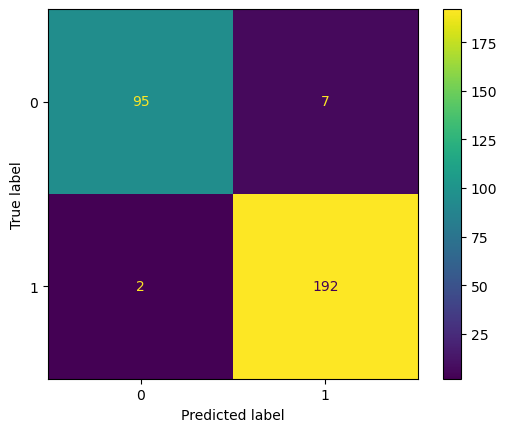

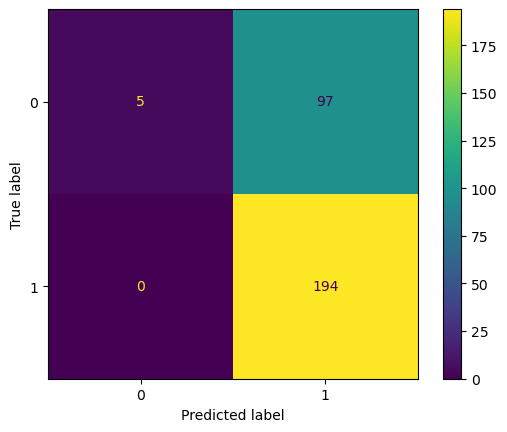

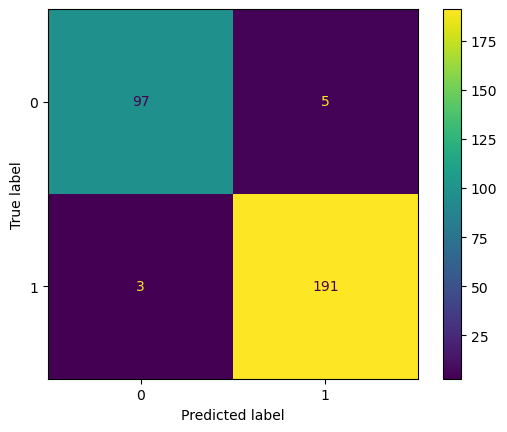

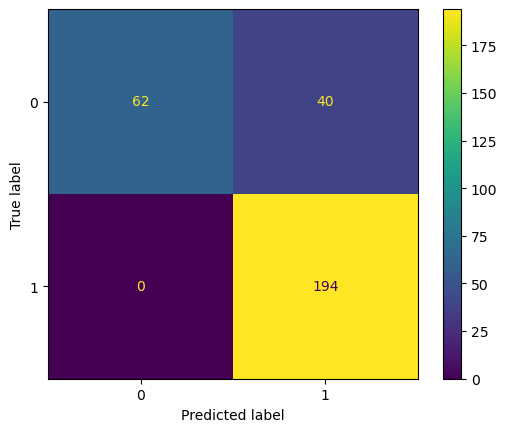

In [121]:
ConfusionMatrixDisplay(cm_rf).plot()
ConfusionMatrixDisplay(cm_svm).plot()
ConfusionMatrixDisplay(cm_ada).plot()
ConfusionMatrixDisplay(cm_lr).plot()

In [122]:
from sklearn.feature_selection import RFECV

In [123]:
estimators = [RandomForestClassifier(), SVC(), AdaBoostClassifier(), LogisticRegression()]

In [124]:
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [125]:
y_pred_rfe = rfe.predict(x_test)

In [126]:
for estimator in estimators:
    rfe = RFECV(estimator, cv=5)
    rfe.fit(x_train, y_train)
    print("Optimal number of features : %d" % rfe.n_features_)

Optimal number of features : 15


ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [127]:
cm_rfe = confusion_matrix(y_test, y_pred_rfe)

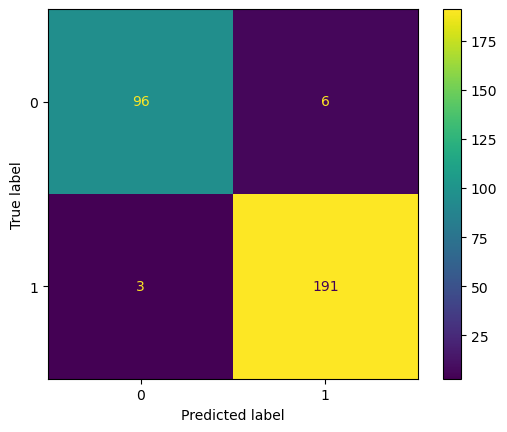

In [128]:
ConfusionMatrixDisplay(cm_rfe).plot()

In [129]:
accuracy = accuracy_score(y_test, y_pred_rfe)
print("Accuracy of rfe:", accuracy *100)

Accuracy of rfe: 96.95945945945947


In [130]:
c5 = classification_report(y_test, y_pred_rfe)
print("Classification report \n\n:", c5)

Classification report 

:               precision    recall  f1-score   support

          no       0.97      0.94      0.96       102
         yes       0.97      0.98      0.98       194

    accuracy                           0.97       296
   macro avg       0.97      0.96      0.97       296
weighted avg       0.97      0.97      0.97       296

